In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)
sns.set(style="whitegrid")

print("✅ Libraries loaded successfully")


✅ Libraries loaded successfully


In [2]:
file_path = "../data/synthetic_sales.csv"

df = pd.read_csv(file_path)
df.head()


,OrderID,OrderDate,Region,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,CustomerSegment,Returned,ShipMode,Comments
0,ORD-12515,2022-11-17 00:00:00,West,Furniture,Chairs,Chairs 2515,140.93,2,0.3,18.86,Consumer,No,Standard Class,Expedited delivery
1,ORD-13168,2023-08-04 00:00:00,South,Furniture,Tables,Tables 3168,369.66,6,0.2,63.15,Consumer,No,Same Day,Damaged box
2,ORD-14668,2022-08-05 00:00:00,North,Office Supplies,Storage,Storage 4668,92.40,4,0.4,3.40,Home Office,No,Second Class,NaN
3,ORD-12843,2022-03-08 00:00:00,East,Furniture,Bookcases,Bookcases 2843,190.48,8,0.3,25.25,Consumer,No,Same Day,NaN
4,ORD-14156,2022-08-29 00:00:00,south,Furniture,Furnishings,Furnishings 4156,516.90,3,0.5,18.74,Home Office,No,First Class,Delayed shipment


In [3]:
print("🧾 Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values per column:")
print(df.isna().sum())


🧾 Dataset shape: (5000, 14)

Columns: ['OrderID', 'OrderDate', 'Region', 'Category', 'SubCategory', 'ProductName', 'Sales', 'Quantity', 'Discount', 'Profit', 'CustomerSegment', 'Returned', 'ShipMode', 'Comments']

Missing values per column:
OrderID               0
OrderDate             0
Region                0
Category              0
SubCategory           0
ProductName           0
Sales               250
Quantity              0
Discount              0
Profit              250
CustomerSegment       0
Returned              0
ShipMode              0
Comments           1679
dtype: int64


In [4]:
# Normalize column names
df.columns = [c.strip().replace(" ", "_").lower() for c in df.columns]
print("✅ Column names standardized:")
print(df.columns.tolist())


✅ Column names standardized:
['orderid', 'orderdate', 'region', 'category', 'subcategory', 'productname', 'sales', 'quantity', 'discount', 'profit', 'customersegment', 'returned', 'shipmode', 'comments']


In [5]:
# Convert OrderDate to datetime, coercing errors to NaT
df['orderdate'] = pd.to_datetime(df['orderdate'], errors='coerce')

# Count how many invalid dates were fixed
invalid_dates = df['orderdate'].isna().sum()
print(f"🧹 Invalid dates fixed (converted to NaT): {invalid_dates}")


🧹 Invalid dates fixed (converted to NaT): 150


In [7]:
numeric_cols = ['sales', 'profit']

for col in numeric_cols:
    missing_count = df[col].isna().sum()
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)
    print(f"✅ Filled {missing_count} missing values in '{col}' with median ({median_value:.2f})")


✅ Filled 0 missing values in 'sales' with median (339.00)
✅ Filled 0 missing values in 'profit' with median (38.28)


## Data Cleaning & Preparation

Before analyzing, I cleaned the dataset to handle missing, invalid, or inconsistent values.
Key steps:
- Fixed invalid dates (`NotADate`) → converted to `NaT`
- Filled missing sales/profit with column medians
- Standardized text formatting (e.g., region names)
- Ensured no blank records remained


## Exploratory Data Analysis (EDA)

In this section, we’ll visualize trends in sales, profit, and discounts across categories, regions, and time.


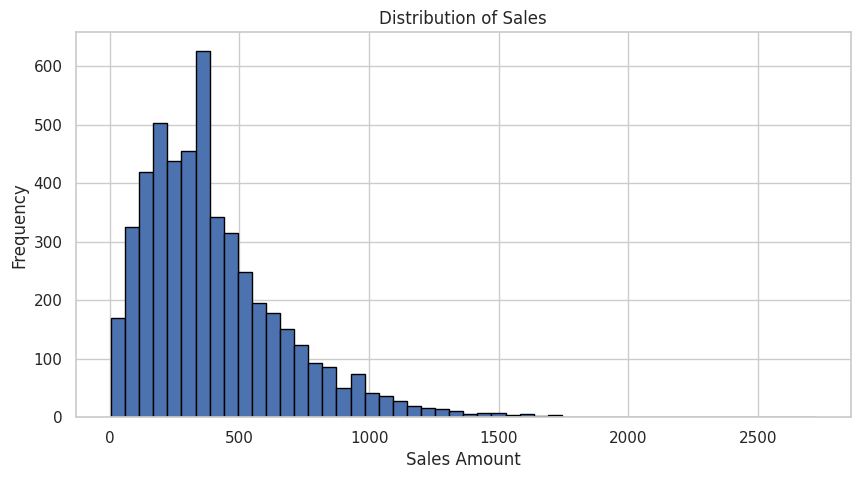

In [9]:
plt.figure(figsize=(10,5))
plt.hist(df['sales'], bins=50, edgecolor='black')
plt.title("Distribution of Sales")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()


/tmp/ipykernel_85823/4054102576.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='Blues_d')


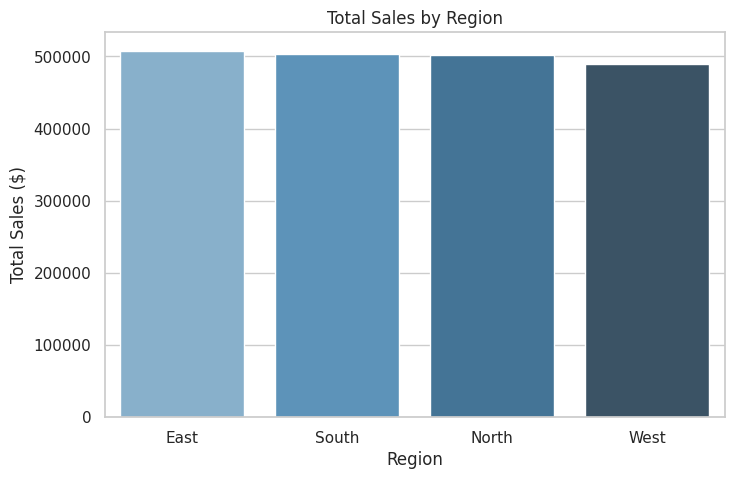

In [10]:
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='Blues_d')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.show()


/tmp/ipykernel_85823/2832726052.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profit.index, y=category_profit.values, palette='Greens_d')


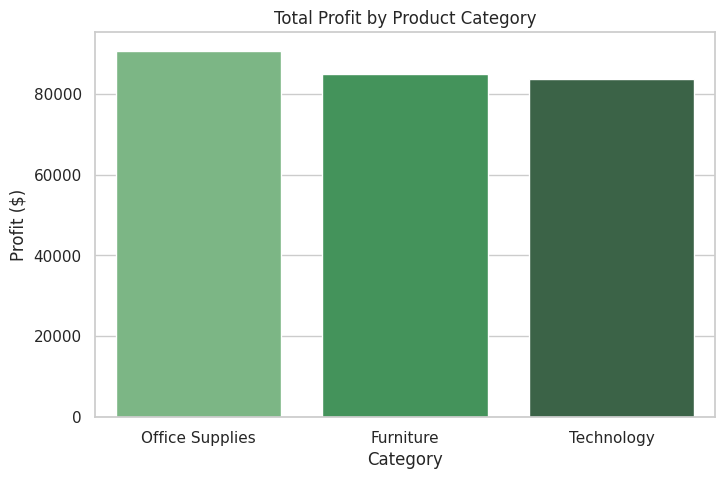

In [11]:
category_profit = df.groupby('category')['profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_profit.index, y=category_profit.values, palette='Greens_d')
plt.title("Total Profit by Product Category")
plt.xlabel("Category")
plt.ylabel("Profit ($)")
plt.show()


/tmp/ipykernel_85823/835231574.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subcategories.values, y=top_subcategories.index, palette='coolwarm')


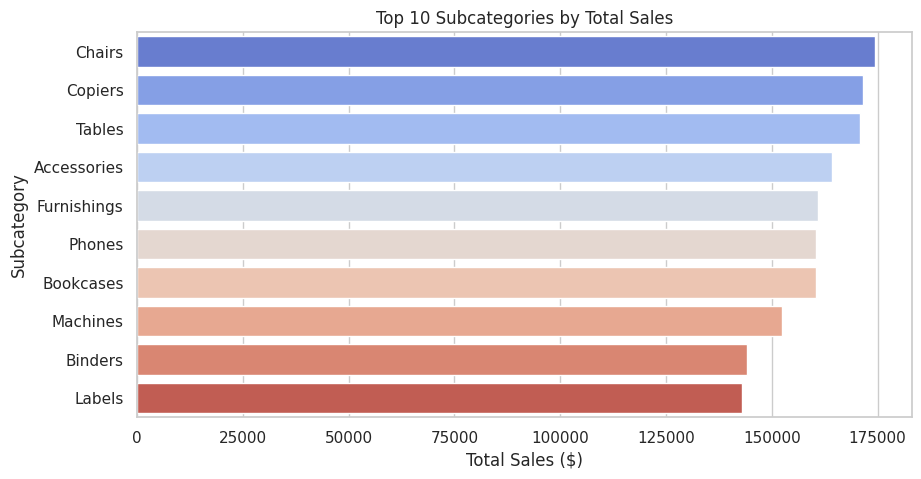

In [12]:
top_subcategories = df.groupby('subcategory')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_subcategories.values, y=top_subcategories.index, palette='coolwarm')
plt.title("Top 10 Subcategories by Total Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Subcategory")
plt.show()


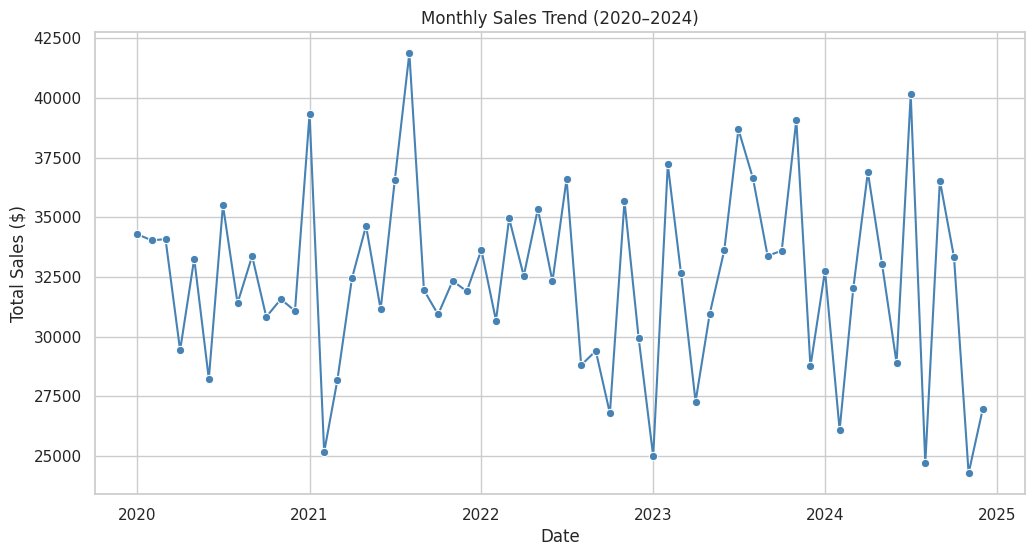

In [13]:
df['year'] = df['orderdate'].dt.year
df['month'] = df['orderdate'].dt.month

monthly_sales = df.groupby(['year', 'month'])['sales'].sum().reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='sales', data=monthly_sales, marker='o', color='steelblue')
plt.title("Monthly Sales Trend (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()


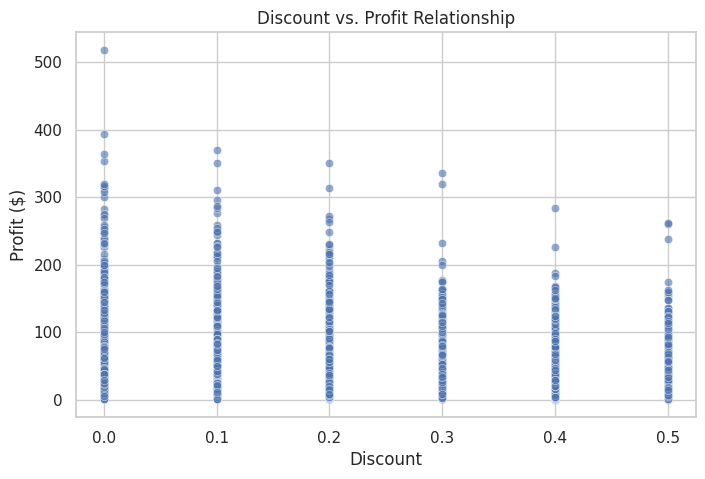

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='discount', y='profit', data=df, alpha=0.6)
plt.title("Discount vs. Profit Relationship")
plt.xlabel("Discount")
plt.ylabel("Profit ($)")
plt.grid(True)
plt.show()


/tmp/ipykernel_85823/2824170822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_sales.index, y=segment_sales.values, palette='Purples')


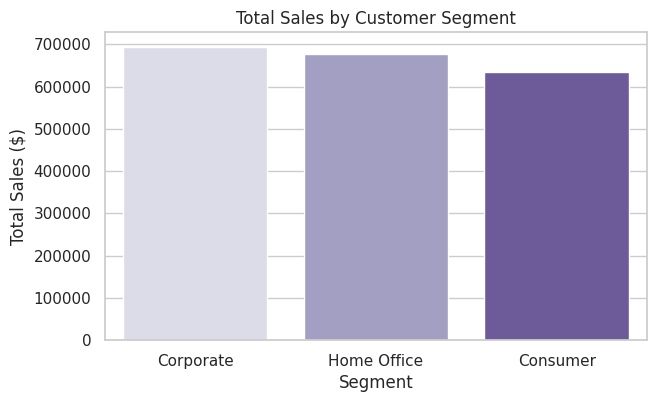

In [15]:
segment_sales = df.groupby('customersegment')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=segment_sales.index, y=segment_sales.values, palette='Purples')
plt.title("Total Sales by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Total Sales ($)")
plt.show()
